### 调用KNN函数来实现分类
数据采用的是经典的iris数据，是三分类问题

In [1]:
# 读取相应的库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
# 读取数据 X, y
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 把数据分成训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [4]:
# 构建KNN模型， K值为3、 并做训练
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
# 计算准确率
from sklearn.metrics import accuracy_score
# correct = np.count_nonzero((clf.predict(X_test)==y_test)==True)
print("Accuracy is: %.3f" % accuracy_score(y_test, clf.predict(X_test)))
# print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


###  从零开始自己写一个KNN算法

In [6]:
from sklearn import datasets
from collections import Counter  # 为了做投票
from sklearn.model_selection import train_test_split
import numpy as np

# 导入iris数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [7]:
def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # TODO
    dist = np.sqrt(sum((instance1 - instance2)**2))
    return dist
    
 
def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # TODO  返回testInstance的预测标签 = {0,1,2}
    distances = [euc_dis(x, testInstance) for x in X]
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors]) 
    return count.most_common()[0][0]

In [8]:
# 预测结果。    
predictions = [knn_classify(X_train, y_train, data, 3) for data in X_test]
correct = np.count_nonzero((predictions==y_test)==True)
#print("Accuracy is: %.3f" % accuracy_score(y_test, clf.predict(X_test)))
print ("Accuracy is: %.3f" %(correct/len(X_test)))

Accuracy is: 0.921


###  KNN的决策边界

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1,50], [[1,0],[0,10]], n_points)
X2 = np.random.multivariate_normal([2,50], [[1,0],[0,10]], n_points)

In [10]:
X = np.concatenate([X1,X2])
y = np.array([0]*n_points + [1]*n_points)
print (X.shape, y.shape)

(200, 2) (200,)


In [11]:
# KNN模型的训练过程
clfs = []
neighbors = [1,3,5,9,11,13,15,17,19]
for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors=neighbors[i]).fit(X,y))

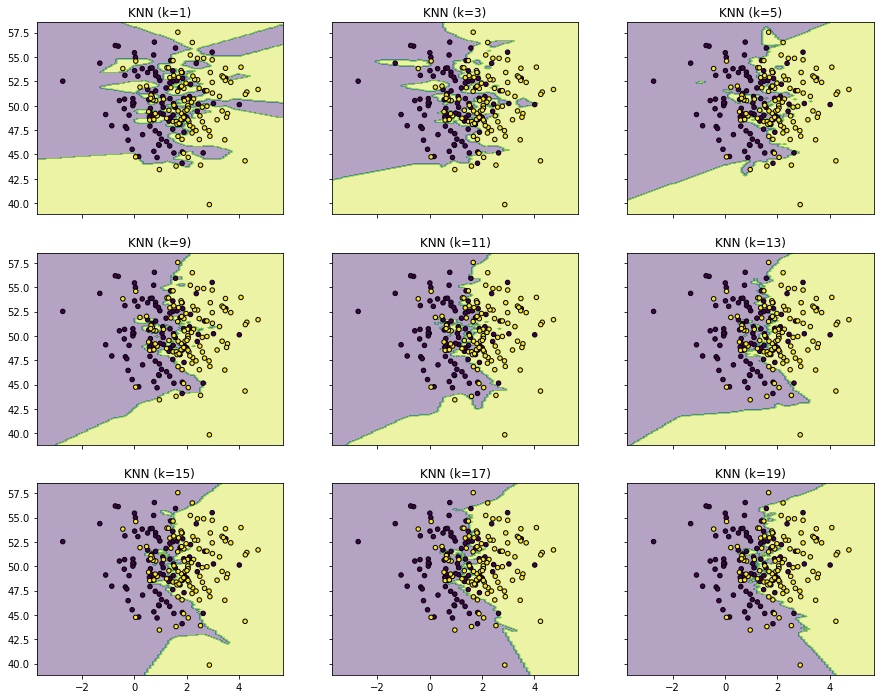

In [12]:
# 可视化结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex='col', sharey='row', figsize=(15, 12))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        clfs,
                        ['KNN (k=%d)'%k for k in neighbors]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()